In [1]:
import os
from enum import Enum
import pandas as pd
import re
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class Gender(Enum):
    male = 0
    female = 1
    unknown = 2


In [2]:

ids_path = os.path.join(os.environ["AAN_DIR"],
    "release/2014/acl-metadata.txt")

female_paths = [os.path.join(os.environ["AAN_DIR"],"save",
    f) for f in ["acl-female.txt", "machine_females.txt", "machine_femalesNAM.txt"]]

male_paths = [os.path.join(os.environ["AAN_DIR"],
    f) for f in ["acl-male.txt", "machine_males.txt", "machine_malesNAM.txt"]]

females = set()
males = set()
for file in female_paths:
    with open(file, 'r', encoding = "utf-8") as f:
        females.update(map(lambda x:  html.unescape(x.strip()), f.read().split("\n")))

for file in male_paths:
    with open(file, 'r', encoding = "utf-8") as f:
        males.update(map(lambda x:  html.unescape(x.strip()), f.read().split("\n")))

In [3]:
new_unkown = set()
dic = []
fields = ["id", "authors", "title", "venue", "year","genders"]
prev=[]
known = set()
auths = set()
known_f = set()
known_m = set()
genders = dict()
unique_ids = set()
print(len(females))
print(len(males))
print("Adreevskaia, Alina" in females)
with open(ids_path,"r", encoding="utf-8") as f:
    paper_data = f.read().split("\n\n")
    for idx,paper in enumerate(paper_data):
        values = paper.split("\n")[:len(fields)-1]

        values = dict(zip(fields,[re.search(r'{(.*?)}',s).group(1) for s in values]+[[]]))
        if(values["id"]) in unique_ids:
            continue
        unique_ids.add(values["id"])
        values["year"] = int(values["year"])
        values["authors"] = values["authors"].split("; ")
        for auth in values["authors"]: 
            auth = auth.strip() 
            auth = html.unescape(auth)
            auths.add(auth)
            gender = Gender.unknown
            if auth in females:
                gender = Gender.female
                known.add(auth)
                known_f.add(auth)
            elif auth in males:
                gender = Gender.male
                known.add(auth)
                known_m.add(auth)
            # elif auth not in known_unknowns:
            else:
                new_unkown.add(auth)
            values["genders"].append(gender)
            genders[auth] = gender
        dic.append(values)
        prev = values
        #if idx==5:
        #    break
    print(idx)
    print(len(auths))
    print(len(known))
    print(len(new_unkown))
    print(len(known_f))
    print(len(known_m))

4916
12456
True
26048
18296
16408
1888
4641
11767


In [4]:
df = pd.DataFrame(dic)#.set_index(["id"])

In [5]:
print("Total papers: {0}".format(df.shape[0]))
n = len(auths)
print("Females: {0}, Males: {1}, Unknown: {2}".format(len(known_f),len(known_m),len(new_unkown)))
print("Females: {0:.2f} Males: {1:.2f} Unknown: {2:.2f}".format(len(known_f)/n, len(known_m)/n,len(new_unkown)/n))

Total papers: 23766
Females: 4641, Males: 11767, Unknown: 1888
Females: 0.25 Males: 0.64 Unknown: 0.10


In [6]:
from itertools import chain
categories =list( map(lambda e: e.value,list(chain.from_iterable(df["genders"].values))))
from collections import Counter
Counter(categories)

Counter({0: 43800, 1: 15421, 2: 3317})

In [7]:
f = [0] * len(known_f)
m = [1] * len(known_m)
u = [2] * len(new_unkown)

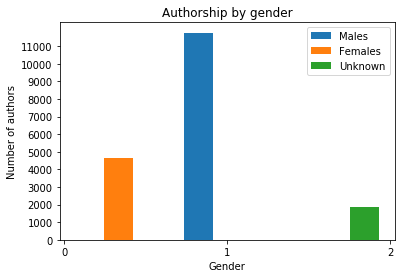

In [8]:
import numpy as np
axes = plt.hist([m,f,u],label=["Males","Females","Unknown"], bins=3)
plt.legend()
plt.xticks([0,1,2])
plt.yticks(np.arange(0,12000,1000))
plt.xlabel("Gender")
plt.ylabel("Number of authors")
plt.title("Authorship by gender")
plt.savefig("Authorshipbygender2")
plt.show()
plt.show()

In [9]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Plot and retrieve the axes
# axes = pd.Series(categories).hist(figsize=(12,6),bins=[0,0.5,1,1.5,2,2.5])

# # Define a different color for the first three bars
# colors = ["#e74c3c", "#2ecc71", "#3498db"]

# k=0
# axes.grid(False)
# axes.spines['top'].set_visible(False)
# axes.spines['right'].set_visible(False)
# axes.set_xticks([])
# axes.set_yticklabels(np.arange(0,9000,1000))
# ls=["Male","Female","Unknown"]
# for rect in axes.patches:
#     # If there's a value in the rect and we have defined a color
#     if rect.get_height() > 0 and k < len(colors):
#         # Set the color
#         rect.set_color(colors[k])
#         rect.set_label(ls[k])
#         # Increment the counter
#         k += 1

# plt.legend()
# plt.xlabel("Gender")
# plt.ylabel("Number of authors")
# plt.title("Authorship by gender")
# plt.savefig("Authorship by gender")
# plt.show()

In [10]:
first_females = 0
first_males = 0
first_unknown = 0
for paper in df["genders"]:
    if paper[0] == Gender.female:
        first_females += 1
    elif paper[0] == Gender.male:
        first_males += 1
    else:
        first_unknown += 1
p = df["genders"].shape[0]        
print(first_males, first_females, first_unknown)
print("Females: {0:.2f} Males: {1:.2f} Unknown: {2:.2f}".format(first_females/p, first_males/p,first_unknown/p))

16316 6134 1316
Females: 0.26 Males: 0.69 Unknown: 0.06


In [11]:
i = 0
for paper in df["genders"]:
    i+=1
print(i)

23766


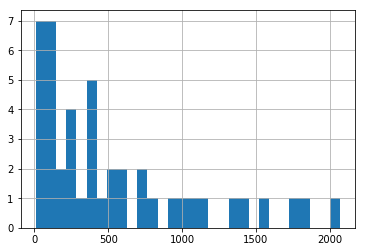

In [12]:
plt.figure()
df["year"].value_counts().hist(bins=30)
plt.show()

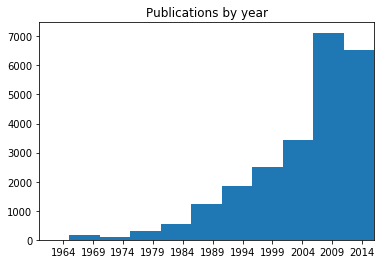

In [13]:
a=list(map(lambda x: int(x), list(df["year"].values)))
plt.hist(a)
plt.xlim([1960,2016])
plt.xticks(np.arange(1964,2015,5))
plt.title("Publications by year")
plt.show()

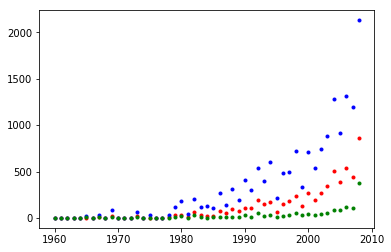

In [14]:
from collections import defaultdict
plt.figure()
yrs = []
x = []
y = []
z = []
for i in range(1960,2009):
    year = df[df["year"] == i]
    auths = set(chain.from_iterable(year["authors"]))
    yf=0
    ym=0
    yu=0
    for a in auths:
        if a in known_f: yf+=1
        elif a in known_m: ym+=1
        else: yu+=1
    yrs.append(i)
    x.append(yf)
    y.append(ym)
    z.append(yu)
    plt.plot(i,yf,'.r')
    plt.plot(i,ym,'.b')
    plt.plot(i,yu,'.g')
plt.show()

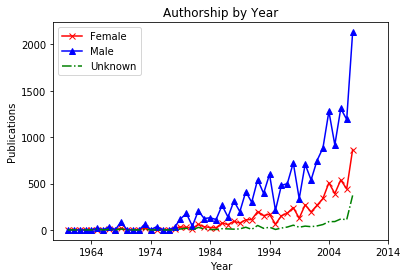

In [15]:
plt.figure()
plt.plot(yrs,x,'-xr',label="Female")
plt.plot(yrs,y,'-^b',label="Male")
plt.plot(yrs,z,'-.g',label="Unknown")
b=np.arange(1964,2015,10)
plt.xticks(b)
plt.legend()
plt.title("Authorship by Year")
plt.ylabel("Publications")
plt.xlabel("Year")
plt.savefig("GenderByYear")
plt.show()
#COOauthors
#ratios